In [2]:
%cd ..
%load_ext autoreload
%autoreload 2

/home/amir/rqc_internship/gaus_repo


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import join as jn
import os
import yaml
import torch
from torchinfo import summary
from tqdm.notebook import tqdm
from torch.utils.data import DataLoader, Dataset


In [4]:
from video_pipeline.video_module import *

ModuleNotFoundError: No module named 'video_pipeline'

In [4]:
with open('params.yaml') as conf_file:
    config = yaml.safe_load(conf_file)
with open('pathes.yaml') as conf_file:
    path_config = yaml.safe_load(conf_file)

pressure_path = path_config['p_video_path']
signal_path = path_config['test_s_video_path']


KeyError: 'p_video_path'

In [5]:
dataset = np.load('data/pressure/pic/0.npy')

In [6]:
test_pressures = [
    torch.from_numpy(dataset[0:1]),
    torch.from_numpy(dataset[1:2]),
    torch.from_numpy(dataset[2:3]),
]

In [26]:
config['sim']['test_mod'] = False

In [ ]:
# config['env']['phys']['gaus_kernel_size'] = 3

In [27]:
import torch_sensor_lib as tsl
sim = tsl.FiberSimulator(config)

In [ ]:
!dvc pull learning

In [44]:
model = torch.load('data/model/TorchSensorNN5S_norm_deep.pt', map_location='cpu')

In [10]:
loss_mse = torch.nn.MSELoss()

In [22]:
loss_mse(test_pressures[0], test_pressures[1])

tensor(0.1976)

In [42]:
optim = torch.optim.Adam(model.parameters(), lr=1e-4)

### step in notmal loss

In [49]:
model = torch.load('data/model/TorchSensorNN5S_norm_deep.pt', map_location='cpu')
optim = torch.optim.Adam(model.parameters(), lr=1e-4)

In [50]:
i = 0
optim.zero_grad()

sig = sim.fiber_real_sim(test_pressures[i])
sig.shape
pred = model(sig)
pred.shape
loss = loss_mse(pred, test_pressures[i])
print(loss)

loss.backward()
optim.step()
pred = model(sig)
new_loss = loss_mse(pred, test_pressures[i])
print(new_loss)

tensor(0.0188, grad_fn=<MseLossBackward0>)
tensor(0.0085, grad_fn=<MseLossBackward0>)


### step with my loss

In [11]:
import torch_sensor_lib as tsl
sim = tsl.FiberSimulator(config)

In [12]:
model = torch.load('data/model/TorchSensorNN5S_norm_deep.pt', map_location='cpu')
optim = torch.optim.Adam(model.parameters(), lr=1e-4)

In [35]:
i = 0
optim.zero_grad()

sig = sim.fiber_real_sim(test_pressures[i])
sig.shape
pred = model(sig)
sig_pred = sim.fiber_real_sim(pred)
loss = loss_mse(sig, sig_pred)
print(loss)

loss.backward()
optim.step()
pred = model(sig)
new_loss = loss_mse(sig, sig_pred)
print(new_loss)

tensor(3.8134e-05, grad_fn=<MseLossBackward0>)
tensor(3.8134e-05, grad_fn=<MseLossBackward0>)


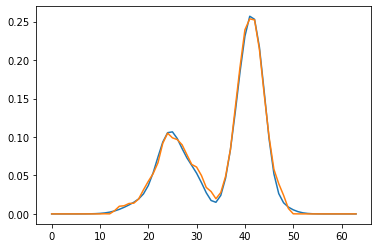

In [41]:
plt.plot(sig[0][0])
plt.plot(sig_pred[0][0].detach())

### Exp with rotating

In [59]:
from torchvision.transforms.functional import rotate as torch_rotate
from torchvision.transforms import InterpolationMode

In [58]:
ang = torch.tensor([1.0])
optim = torch.optim.Adam([ang], lr=1e-4)

In [61]:
pres = test_pressures[0]

rot_pres = torch_rotate(pres, ang[0], interpolation=InterpolationMode.BILINEAR)
plt.imshow(pres)
plt.show()
plt.imshow(rot_pres)
plt.show()

TypeError: Argument angle should be int or float

In [64]:
ang[0].item()

1.0

In [121]:
model = torch.load('data/model/TorchSensorNN5S_norm_deep.pt', map_location='cpu')
optim = torch.optim.Adam(model.parameters(), lr=1e-4)

In [125]:
i = 0
optim.zero_grad()

sig = sim.fiber_real_sim(test_pressures[i])
sig.shape
pred = model(sig)
pred = torch_rotate(pred, 0.1, interpolation=InterpolationMode.BILINEAR)
pred.shape
loss = loss_mse(pred, test_pressures[i])
print(loss)

loss.backward()
optim.step()
pred = model(sig)
pred = torch_rotate(pred, 0.1, interpolation=InterpolationMode.BILINEAR)
new_loss = loss_mse(pred, test_pressures[i])
print(new_loss)

tensor(0.0069, grad_fn=<MseLossBackward0>)
tensor(0.0031, grad_fn=<MseLossBackward0>)


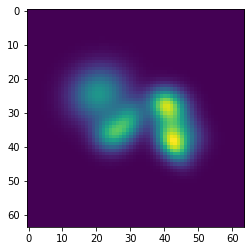

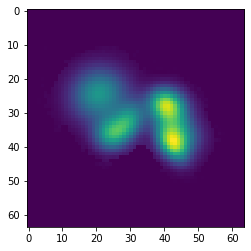

In [120]:
plt.imshow(test_pressures[i][0])
plt.show()
plt.imshow(pred[0].detach())
plt.show()


In [131]:

from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('logdir')
writer.add_graph(sim.fiber_real_sim, test_pressures[0])
# writer.add_graph(model, sig)
writer.close()

ImportError: cannot import name 'metanet_pb2' from partially initialized module 'caffe2.proto' (most likely due to a circular import) (/home/amir/anaconda3/envs/rqc_env/lib/python3.9/site-packages/caffe2/proto/__init__.py)

In [134]:
!pip show torch

Name: torch
Version: 1.11.0
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /home/amir/anaconda3/envs/rqc_env/lib/python3.9/site-packages
Requires: typing-extensions
Required-by: torchvision
